## Importing modules and data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data_test = pd.read_csv("Houses Regression/test.csv")
data_train = pd.read_csv("Houses Regression/train.csv")

## Exploratory data analysis 

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(list(data_train.dtypes))
print(list(data_train.columns))

[dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('in

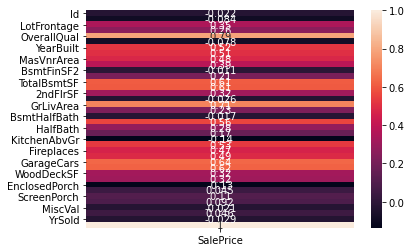

In [7]:
corrMatrix = data_train.corr()
sale_price_corr = corrMatrix[['SalePrice']]
sn.heatmap(sale_price_corr, annot=True)
plt.show()

In [8]:
print(sale_price_corr)

               SalePrice
Id             -0.021917
MSSubClass     -0.084284
LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtFinSF2     -0.011378
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
LowQualFinSF   -0.025606
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
EnclosedPorch  -0.128578
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
SalePrice       1.000000


## Feature selection and preprocessing 

In [9]:
columns1 = ['MSSubClass', 'LotFrontage', 'LotArea','OverallQual','OverallCond', 'YearBuilt', 'MasVnrArea',
            'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea', 'PoolArea', 'GrLivArea', 'FullBath', 'YearRemodAdd',
           '1stFlrSF']
features_train = data_train[columns1]

features_train = features_train.fillna(value = 0)

labels_train = data_train['SalePrice']

features_test = data_test[columns1]
features_test = features_test.fillna(value = 0)

In [10]:
print(labels_train)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [11]:
std_scaler = StandardScaler()
scaled_features_train = pd.DataFrame(std_scaler.fit_transform(features_train), columns = columns1)
print(scaled_features_train)

scaled_features_test = pd.DataFrame(std_scaler.transform(features_test), columns = columns1)
print(scaled_features_test)

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.073375     0.212877 -0.207142     0.651479    -0.517200   1.050994   
1      -0.872563     0.645747 -0.091886    -0.071836     2.179628   0.156734   
2       0.073375     0.299451  0.073480     0.651479    -0.517200   0.984752   
3       0.309859     0.068587 -0.096897     0.651479    -0.517200  -1.863632   
4       0.073375     0.761179  0.375148     1.374795    -0.517200   0.951632   
...          ...          ...       ...          ...          ...        ...   
1455    0.073375     0.126303 -0.260560    -0.071836    -0.517200   0.918511   
1456   -0.872563     0.790037  0.266407    -0.071836     0.381743   0.222975   
1457    0.309859     0.241735 -0.147810     0.651479     3.078570  -1.002492   
1458   -0.872563     0.299451 -0.080160    -0.795151     0.381743  -0.704406   
1459   -0.872563     0.501457 -0.058112    -0.795151     0.381743  -0.207594   

      MasVnrArea  TotalBsmtSF  TotRmsAb

In [12]:
training_set, val_set, training_labels, val_labels = train_test_split(scaled_features_train, labels_train, test_size = 0.2, random_state=42)

## Model creation and fitting 

In [13]:
linear_regressor = LinearRegression()
linear_regressor.fit(training_set, training_labels)
print("The R^2 score on training set is ", linear_regressor.score(training_set,training_labels))
print("The R^2 score on the val set it ", linear_regressor.score(val_set, val_labels))

The R^2 score on training set is  0.7810766672620286
The R^2 score on the val set it  0.8132435583978147


## Predictions for the challenge 

In [14]:
predictions = linear_regressor.predict(scaled_features_test)
print(predictions)
#These are my predictions for the dataset.

[129472.46675393 165222.43382393 168670.72854543 ... 161363.80142235
 113328.85745338 232950.59814022]


In [15]:
print(list(zip(linear_regressor.coef_, columns1)))

[(-6455.19788339362, 'MSSubClass'), (-1358.1829167489996, 'LotFrontage'), (5823.0426225278125, 'LotArea'), (27637.407340946815, 'OverallQual'), (4756.3525479273285, 'OverallCond'), (11822.79036783031, 'YearBuilt'), (4595.2048571262785, 'MasVnrArea'), (4516.2338747333915, 'TotalBsmtSF'), (965.4356262782662, 'TotRmsAbvGrd'), (7974.767519201711, 'GarageArea'), (-804.1627219694349, 'PoolArea'), (25102.228109046617, 'GrLivArea'), (-1569.694079224809, 'FullBath'), (5428.917218957139, 'YearRemodAdd'), (2837.7384142333667, '1stFlrSF')]
